In [4]:
## 필요한 라이브러리를 불러옵니다. 
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
## pyspark를 불러옵니다.
from pyspark import SparkContext
# (1) Import required Python dependencies
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
import random

## 이미 spark context가 살아 있으면 죽이고, 있으면 그대로 사용합니다. 
## spark context는 한 번에 여러 개 돌리려면 세팅에 몇 개를 추가해야 하는것 같아요. 
## 또한 스파크 컨텍스트를 제대로 구현하려면 여기에 넘겨야 하는 값들이 많이 있습니다만, 저는 테스트만 하려고 해서 이걸 대충 세팅했습니다. 

# (2) Instantiate the Spark Context
#spark://6183cd7c29b0:7077
conf = SparkConf().setMaster("spark://127.0.0.1:7077").setAppName("Calculate Pi")
#conf = SparkConf().setMaster("spark://6183cd7c29b0:7077").setAppName("Calculate Pi")
sc = SparkContext(conf=conf)
if sc is None: 
    sc = SparkContext(master="local", appName="first app")
else:
    sc.stop()
    sc = SparkContext(master="local", appName="first app")

## 이미 spark context가 살아 있으면 죽이고, 있으면 그대로 사용합니다. 
## spark context는 한 번에 여러 개 돌리려면 세팅에 몇 개를 추가해야 하는것 같아요. 
## 또한 스파크 컨텍스트를 제대로 구현하려면 여기에 넘겨야 하는 값들이 많이 있습니다만, 저는 테스트만 하려고 해서 이걸 대충 세팅했습니다. 
if sc is None: 
    sc = SparkContext(master="local", appName="first app")
else:
    sc.stop()
    sc = SparkContext(master="local", appName="first app")

### peformance check 
spark_time_lst = []
python_time_lst = []
python_np_time_lst = []
n_lst = [20000*i for i in range(0, 10)]
for n in n_lst:
    def each_k(k):
        return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
    ## with spark 
    start_time = time.time()
    pi_approximated = sc.parallelize(range(0, n)).map(each_k).sum()
    spark_time_lst.append(time.time()-start_time)
    ## pure python
    start_time = time.time()
    pi_approximated = sum((each_k(k) for k in range(0, n)))
    python_time_lst.append(time.time()-start_time)
    ## with numpy 
    start_time = time.time()
    pi_approximated = np.apply_along_axis(arr=np.array(range(0, 10)), func1d=each_k, axis=0).sum()
    python_np_time_lst.append(time.time() - start_time)

No handles with labels found to put in legend.


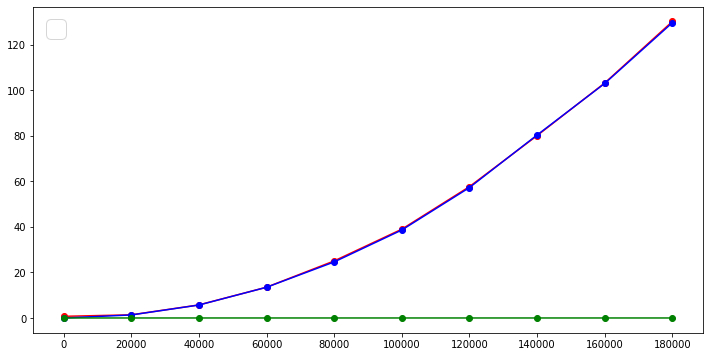

In [6]:
### plotting     
df = pd.DataFrame({
    "spark":spark_time_lst.copy(), 
    "pure python":python_time_lst.copy(), 
    "python with numpy":python_np_time_lst.copy()
}, index = [20000*i for i in range(0, 10)])
plt.figure(figsize=(12, 6))
plt.plot(df['spark'], 'ro-'), plt.plot(df['pure python'], 'bo-'), plt.plot(df['python with numpy'], 'go-')
plt.legend(fontsize=25)
plt.xticks([20000*i for i in range(0, 10)], [20000*i for i in range(0, 10)])
plt.savefig('./180831_pyspark_performance_check.svg')
plt.show()